In [88]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, balanced_accuracy_score, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict
from scipy import stats  # para calcular o intervalo de confiança
from sklearn.metrics import make_scorer, balanced_accuracy_score

from google.colab import drive
drive.mount('/content/drive')

folder_path = '/content/drive/My Drive/Colab Notebooks/Machine Learning'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
X = []
Xnum = []
for i in range(1,4):
  a = pd.read_excel(folder_path + "/Sujet" + str(i) + ".xlsx",sheet_name=0,header=0,index_col=0)
  a = a.drop("beta", axis=1)
  X.append(a)
  Xnum.append(a.iloc[:,:-1])

# Conaissance de data

In [90]:
for i in range(3):
  print(X[i])

          delta      theta      alpha      sigma  puissance  phase
0     41.175791   9.037395  10.451165  10.313667  24.302703      0
1     43.470161   9.271601  11.042753  10.813209  29.538265      0
2     31.621804  11.466909  14.473431  10.517110  26.059694      0
3     42.769873   8.762487   9.329642   8.234078  32.394789      0
4     34.107991   5.557928  13.180524  10.528618  34.936519      0
...         ...        ...        ...        ...        ...    ...
1440  41.553681  21.349732  15.748373   8.552927   9.459562      2
1441  60.131439  14.804001  10.035576   6.172230   9.956917      2
1442  62.094461  13.742361  12.519559   4.771668  11.493985      2
1443  45.661826  19.819196  12.883317   9.412514  10.143689      2
1444  52.435886  17.635786  10.969503   9.797737  12.771394      2

[1445 rows x 6 columns]
          delta      theta      alpha     sigma  puissance  phase
0     81.757198   4.586159   3.459221  3.493629  29.632247      0
1     75.916862   9.580374   1.924576  

In [91]:
for i in range(3):
  print(X[i]["phase"].value_counts())

phase
2    855
5    333
4    140
0    117
Name: count, dtype: int64
phase
2    611
5    365
4    268
0    195
Name: count, dtype: int64
phase
2    770
4    270
5    255
0    144
Name: count, dtype: int64


In [92]:
for i in range(3):
  print(X[i].describe())

             delta        theta        alpha        sigma    puissance  \
count  1445.000000  1445.000000  1445.000000  1445.000000  1445.000000   
mean     66.723761    13.093118     7.674753     6.735614    19.918696   
std      13.175588     5.604184     4.481174     2.936894     8.386314   
min      10.057720     2.617556     0.700521     0.825997     8.380342   
25%      59.176256     9.186130     5.117292     4.751959    13.429616   
50%      66.142418    12.476358     7.153432     6.436712    17.649816   
75%      74.155293    16.751970     9.457860     8.561729    24.019656   
max      94.214166    34.663066    49.718960    19.163797    55.161853   

             phase  
count  1445.000000  
mean      2.723183  
std       1.504673  
min       0.000000  
25%       2.000000  
50%       2.000000  
75%       4.000000  
max       5.000000  
             delta        theta        alpha        sigma    puissance  \
count  1439.000000  1439.000000  1439.000000  1439.000000  1439.000000

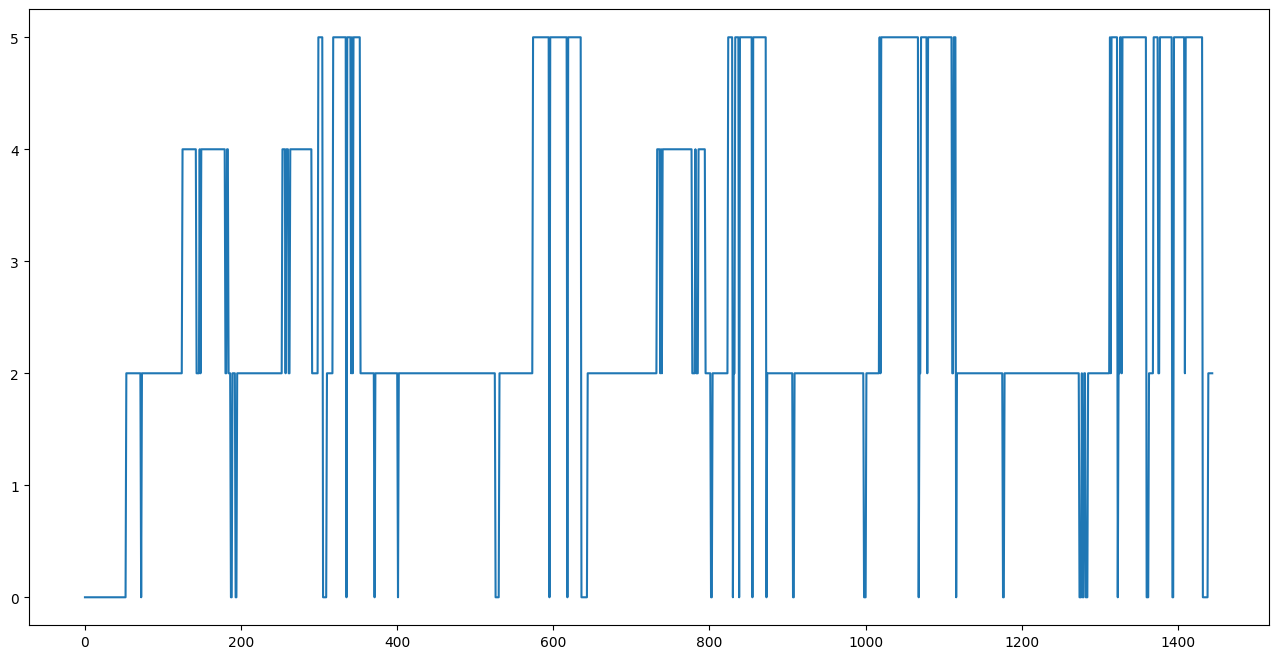

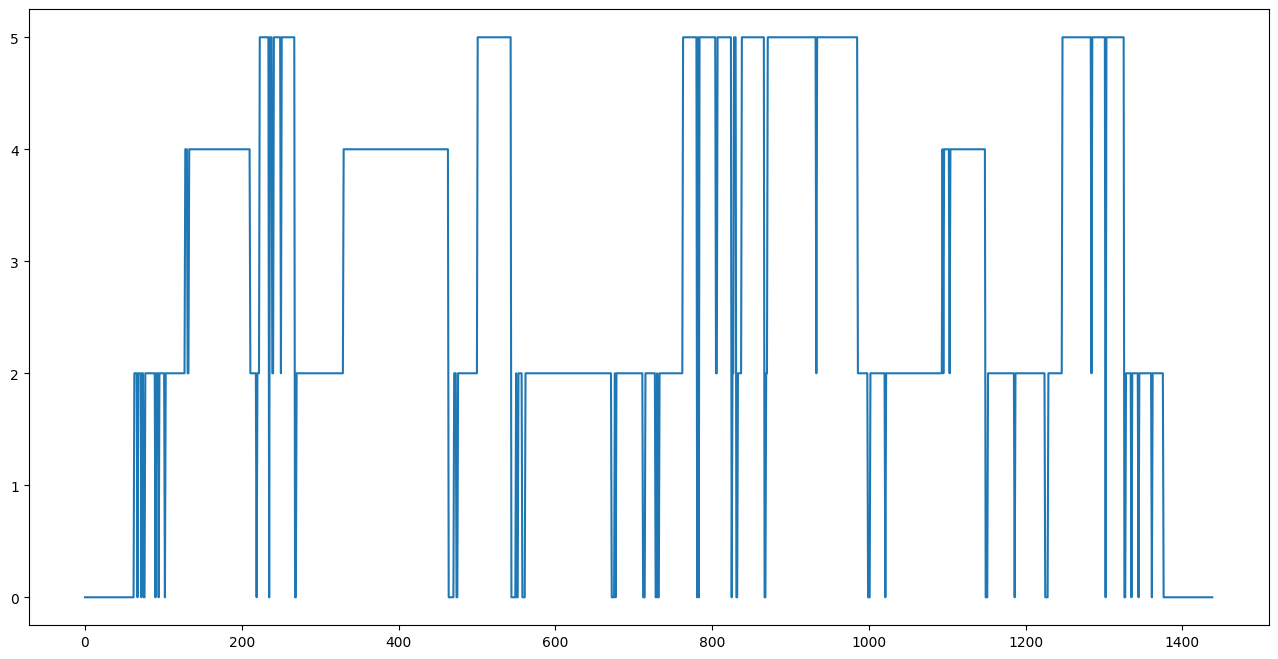

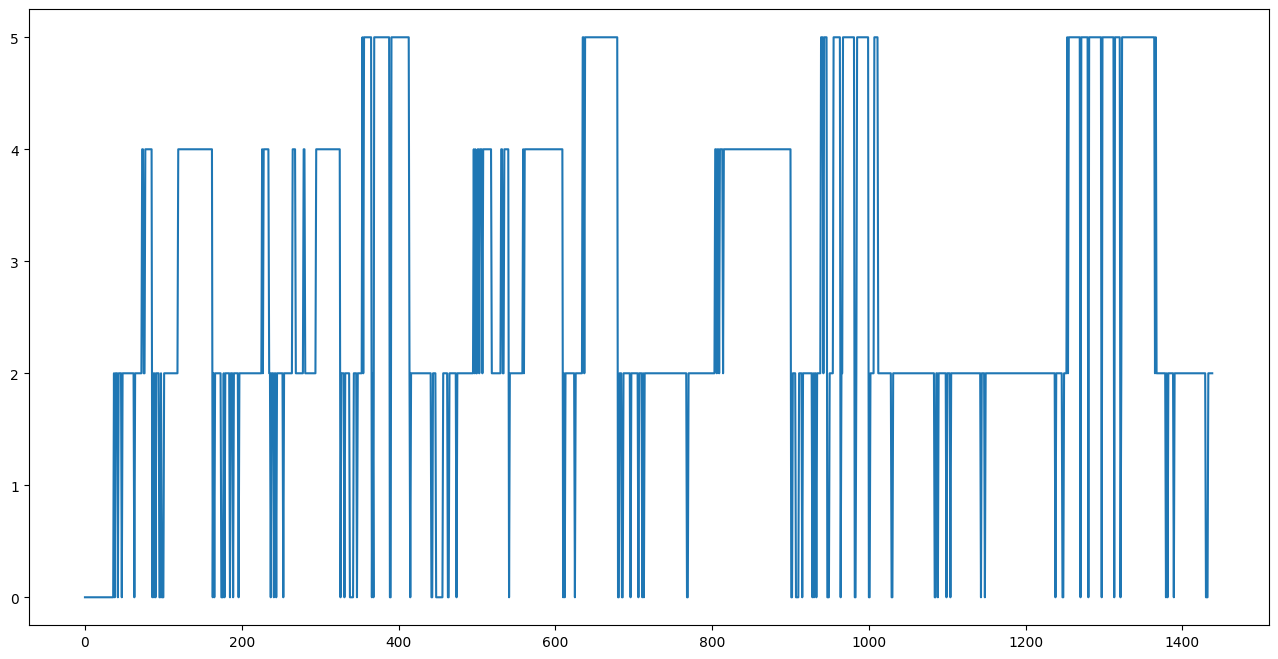

In [93]:
for i in range(3):
  plt.figure(figsize=(16,8))
  plt.plot(X[i]["phase"])

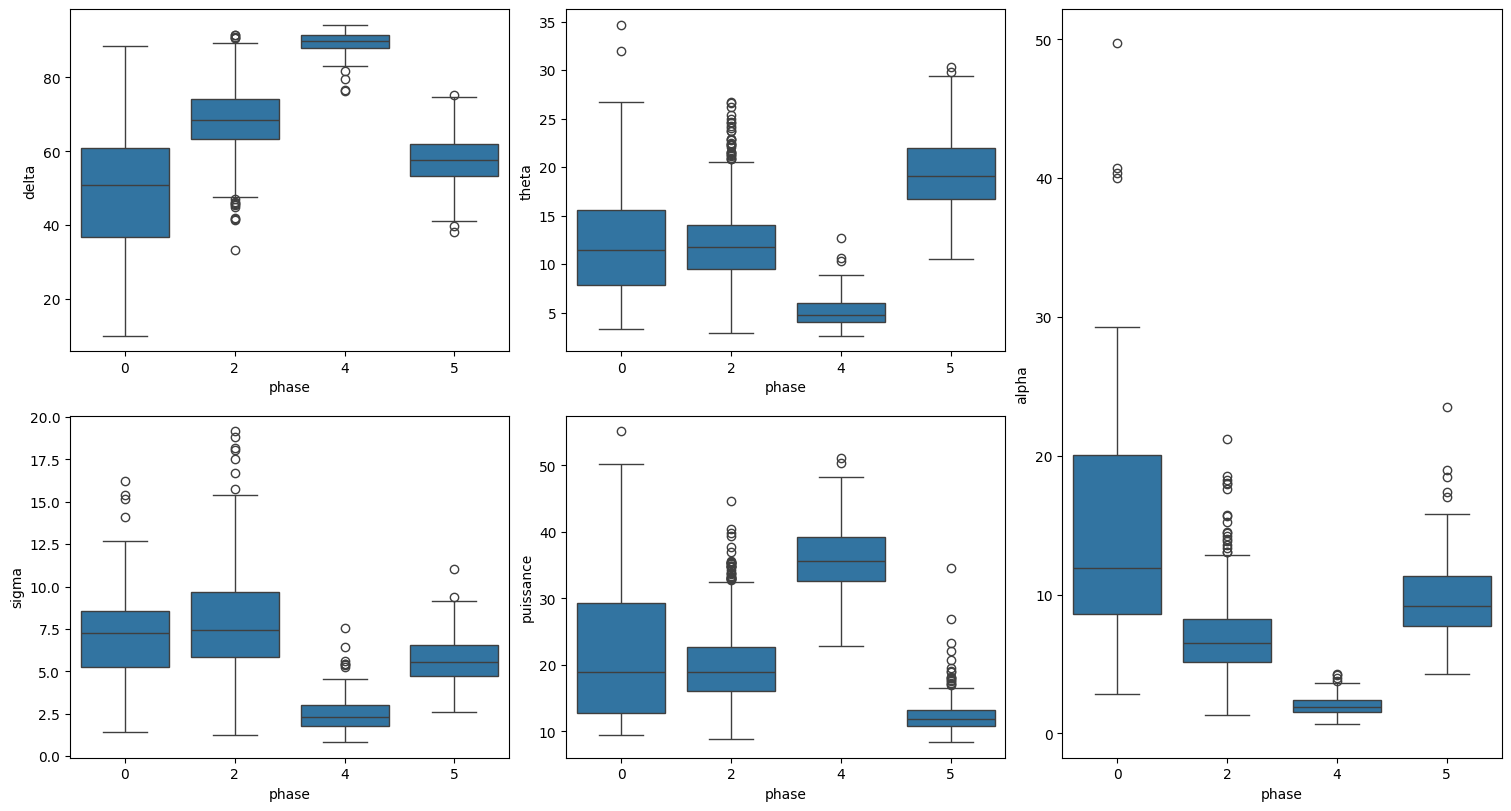

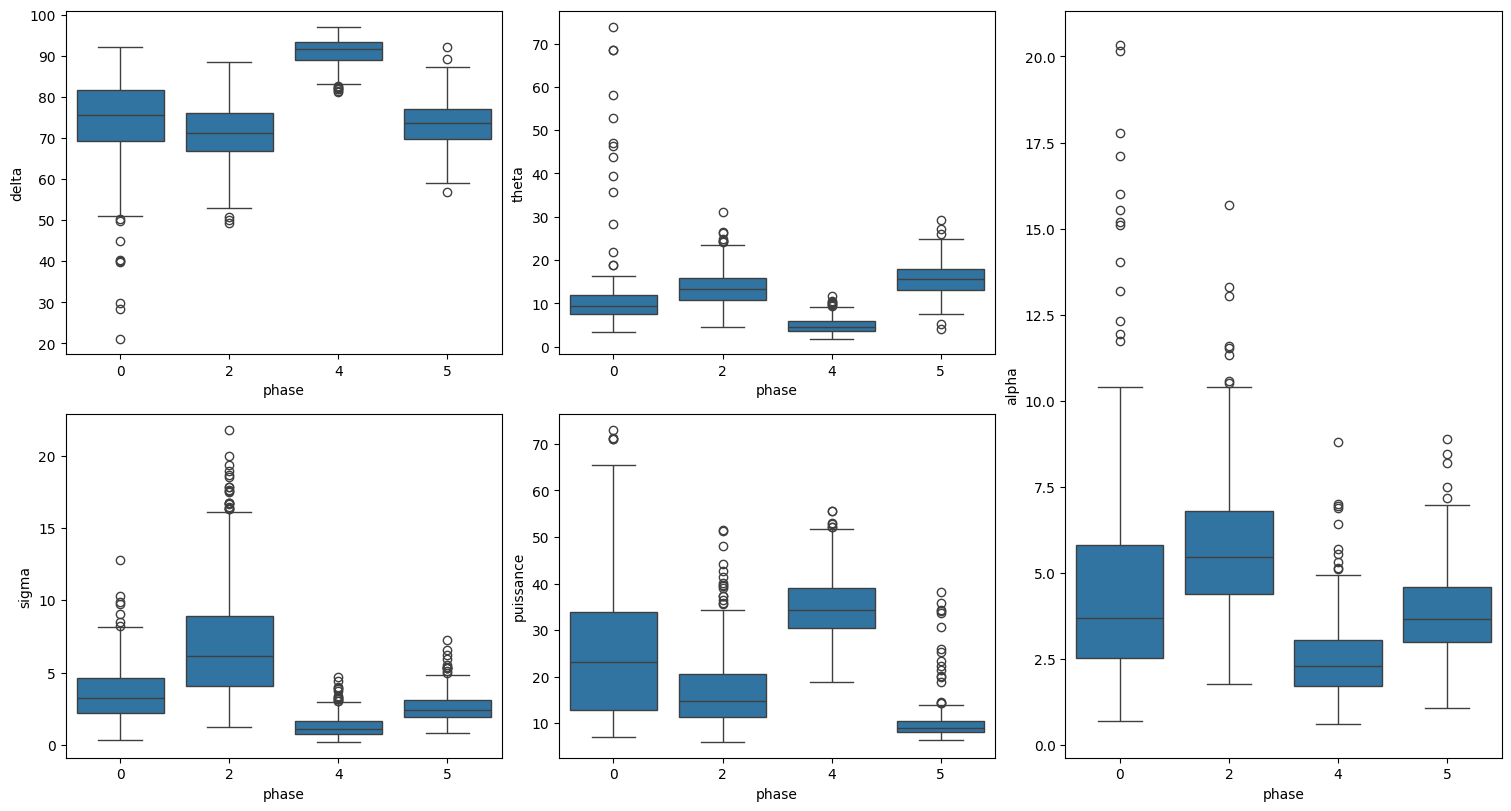

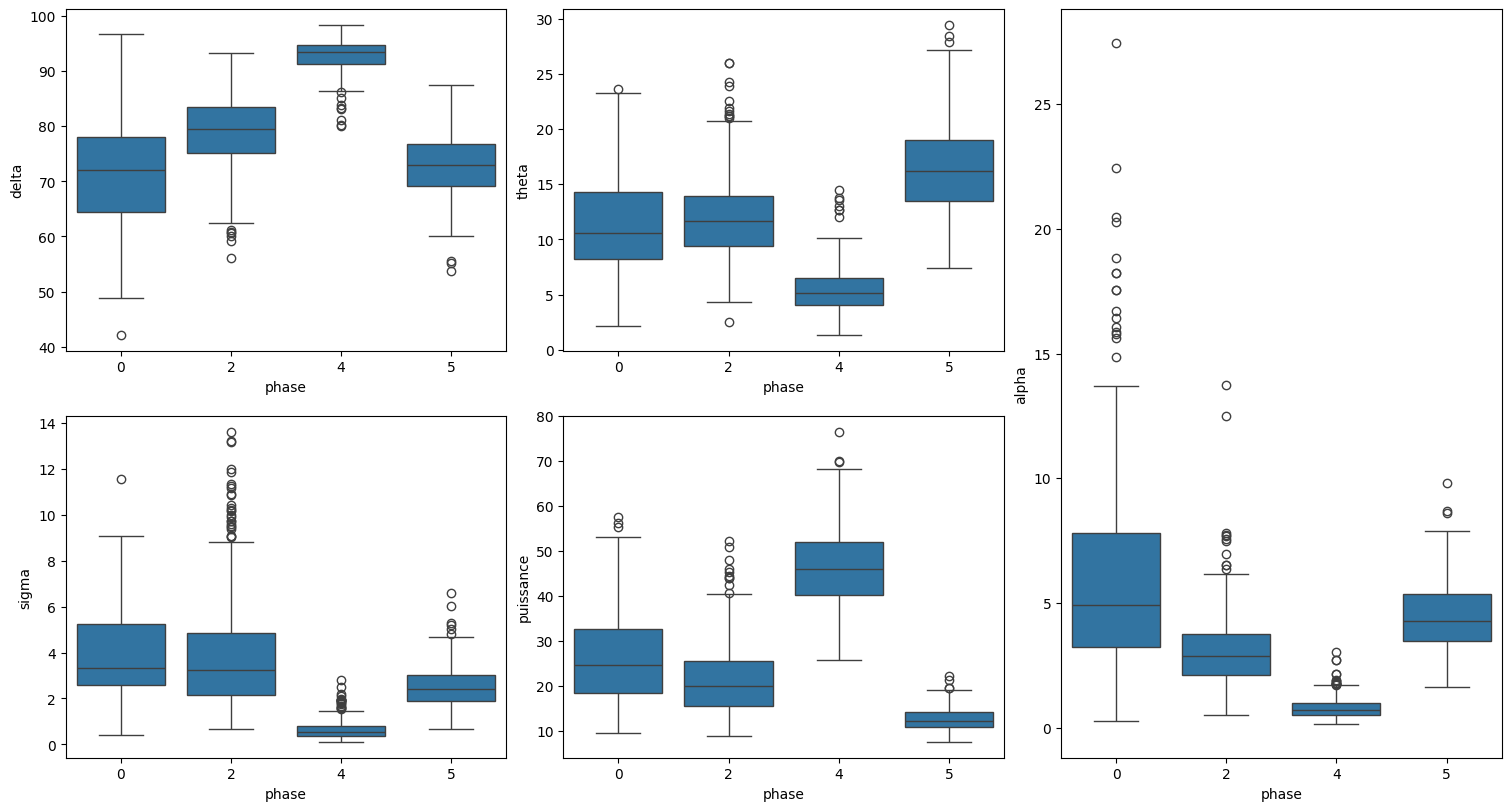

In [94]:
for j in range(3):
  ax = plt.figure(layout="constrained", figsize=(15,8)).subplot_mosaic(
      """
      123
      453
      """
  )
  for i in range(len(X[j].columns)-1):
    sns.boxplot(x="phase", y=X[j].columns[i], data=X[j], ax=ax[str(i+1)])

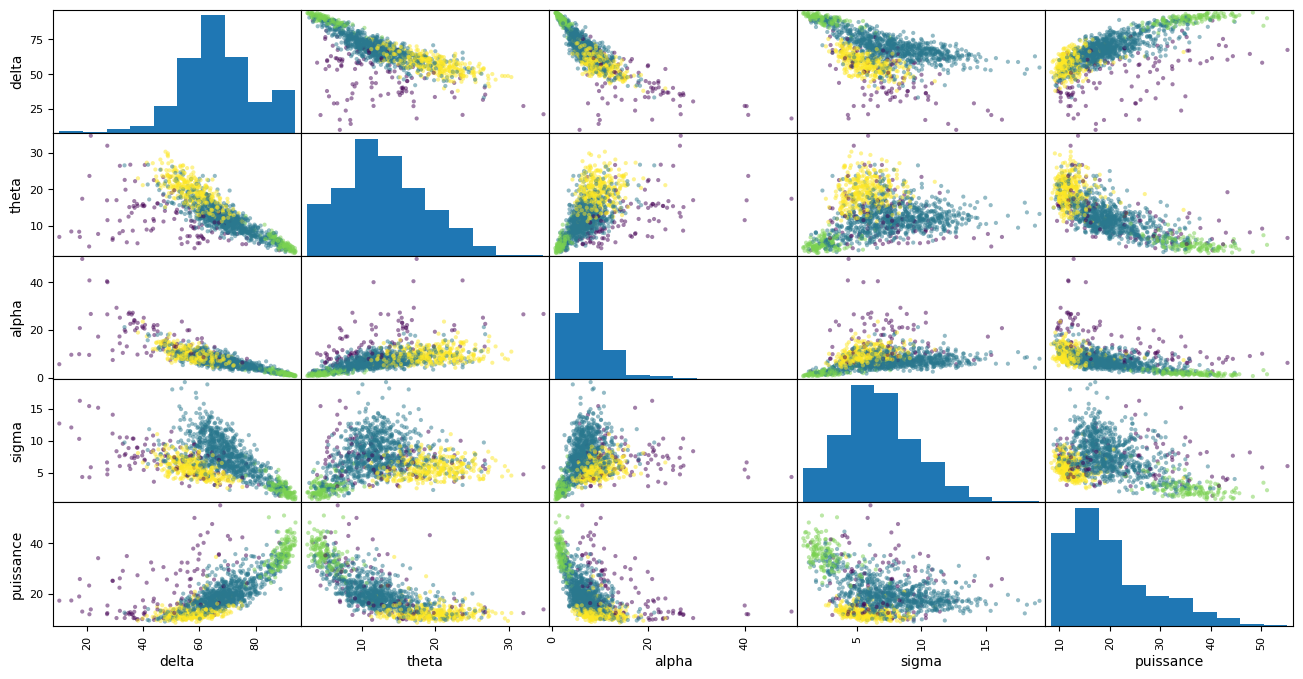

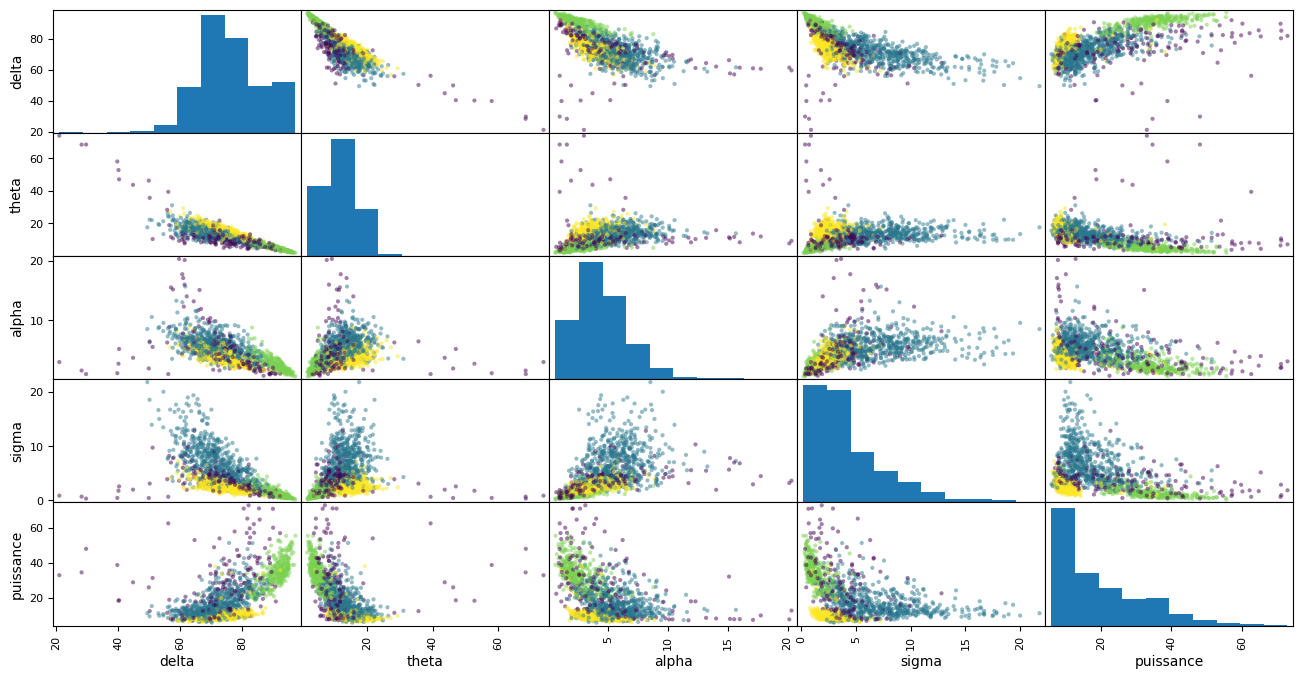

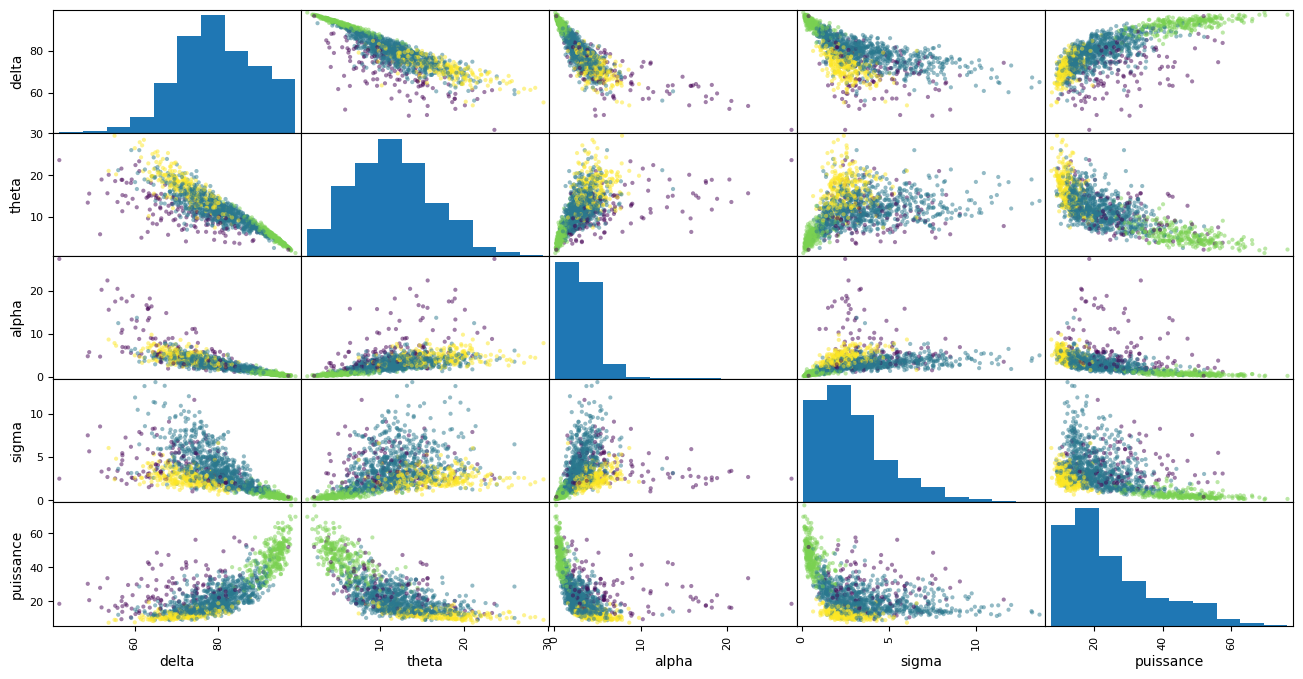

In [95]:
for j in range(3):
  pd.plotting.scatter_matrix(Xnum[j], figsize=(16,8), c=X[j]["phase"]);

In [96]:
lda = LinearDiscriminantAnalysis()
Xlda = []
for i in range(3):
  Xlda.append(lda.fit_transform(Xnum[i],X[i]['phase']))

In [97]:
for i in range(3):
  X[i].groupby('phase').mean()
  lda.transform(X[i].groupby('phase').mean())
  moynew = lda.transform(X[i].groupby('phase').mean())
  print(lda.explained_variance_ratio_)

[0.62135564 0.29283266 0.0858117 ]
[0.62135564 0.29283266 0.0858117 ]
[0.62135564 0.29283266 0.0858117 ]


# SLIDE 3

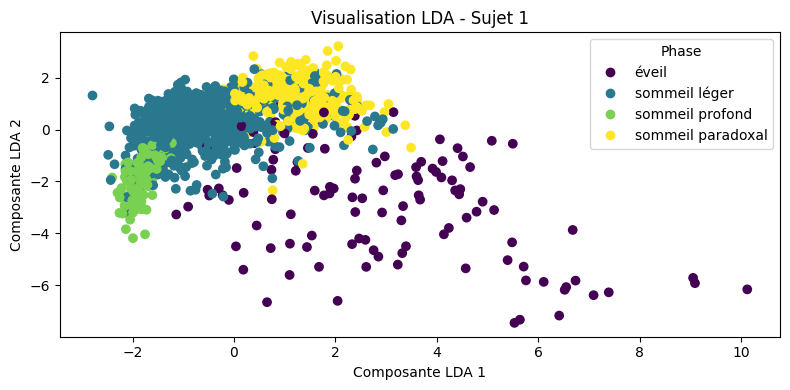

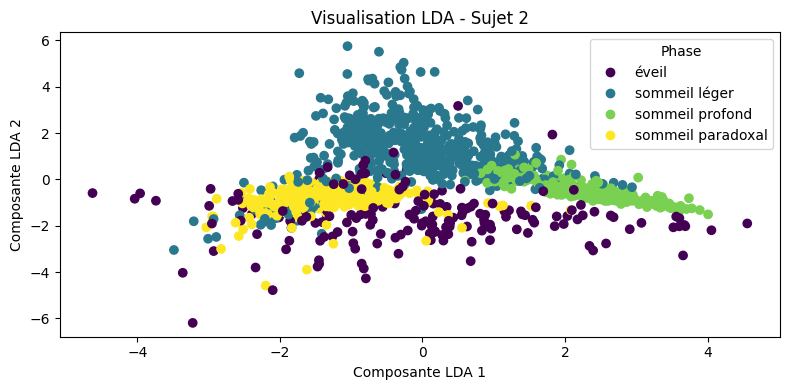

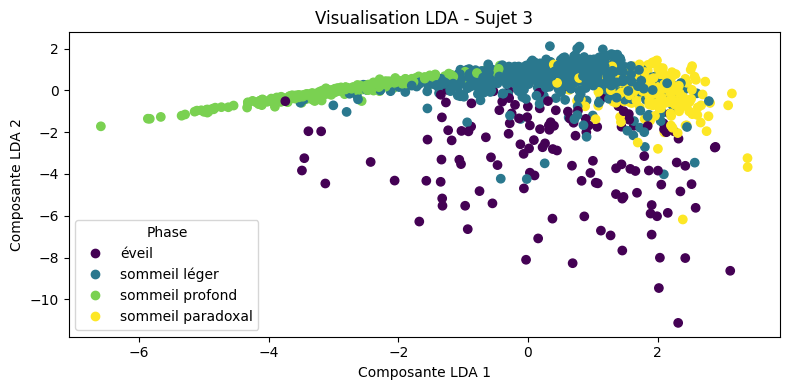

In [98]:
phase_dict = {
    0: 'éveil',
    2: 'sommeil léger',
    4: 'sommeil profond',
    5: 'sommeil paradoxal'
}
for i in range(3):
    plt.figure(figsize=(8, 4))
    scatter = plt.scatter(Xlda[i][:, 0], Xlda[i][:, 1], c=X[i]["phase"])

    unique_phases = X[i]["phase"].unique().tolist()
    legend_labels = [phase_dict[phase] for phase in unique_phases]

    plt.legend(handles=scatter.legend_elements()[0],
               labels=legend_labels, title="Phase")

    # ➤ Ajout du titre
    plt.title(f"Visualisation LDA - Sujet {i+1}")

    # (Optionnel) Ajout de labels d’axes
    plt.xlabel("Composante LDA 1")
    plt.ylabel("Composante LDA 2")

    plt.tight_layout()
    plt.savefig(folder_path + f"ADL_Sujet{i+1}.png")



# SLIDE 2

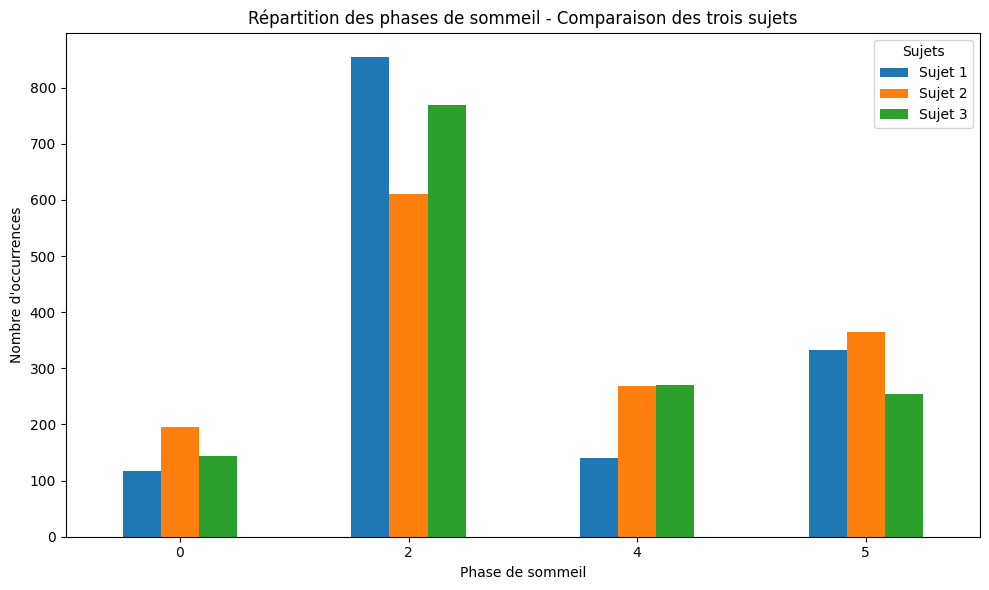

In [99]:
#IA

# Leitura dos dados
data1 = pd.read_excel("/content/drive/My Drive/Colab Notebooks/Machine Learning/Sujet1.xlsx", sheet_name=0, header=0, index_col=0)
data2 = pd.read_excel("/content/drive/My Drive/Colab Notebooks/Machine Learning/Sujet2.xlsx", sheet_name=0, header=0, index_col=0)
data3 = pd.read_excel("/content/drive/My Drive/Colab Notebooks/Machine Learning/Sujet3.xlsx", sheet_name=0, header=0, index_col=0)

# Contagem das fases
counts1 = data1['phase'].value_counts().sort_index()
counts2 = data2['phase'].value_counts().sort_index()
counts3 = data3['phase'].value_counts().sort_index()

# Criação do DataFrame para comparação
df_counts = pd.DataFrame({
    'Sujet 1': counts1,
    'Sujet 2': counts2,
    'Sujet 3': counts3
}).fillna(0)  # preencher com 0 caso alguma fase não exista em algum sujeito

# Plotagem do histograma
df_counts.plot(kind='bar', figsize=(10,6))
plt.title("Répartition des phases de sommeil - Comparaison des trois sujets")
plt.xlabel("Phase de sommeil")
plt.ylabel("Nombre d'occurrences")
plt.xticks(rotation=0)
plt.legend(title="Sujets")
plt.tight_layout()
plt.savefig(folder_path + f"Repartition{i+1}.png")
plt.show()

#SLIDE 2


# Aprentissage par sujet

In [100]:
Xtrain, Xval, Xtrainnum, Xvalnum = [],[],[],[]
for i in range(3):
  Xtrain.append(X[i][:420])
  Xval.append(X[i][420:])
  Xtrainnum.append(Xnum[i][:420])
  Xvalnum.append(Xnum[i][420:])

In [101]:
Xqda, Xadl, Xnaif = [],[],[]
for i in range(3):
  adl = LinearDiscriminantAnalysis()
  qda = QuadraticDiscriminantAnalysis()
  naif = GaussianNB()

  adl.fit_transform(Xtrainnum[i],Xtrain[i]['phase'])
  qda.fit(Xtrainnum[i],Xtrain[i]['phase'])
  naif.fit(Xtrainnum[i],Xtrain[i]['phase'])

  Xadl.append(adl)
  Xqda.append(qda)
  Xnaif.append(naif)

In [102]:
Xpredadl = []
Xpredqda = []
Xprednaif = []
for i in range(3):
  Xpredadl.append(Xadl[i].predict(Xvalnum[i]))
  Xpredqda.append(Xqda[i].predict(Xvalnum[i]))
  Xprednaif.append(Xnaif[i].predict(Xvalnum[i]))

# SLIDE 5

 Figure enregistrée sous : /content/drive/My Drive/Colab Notebooks/Machine LearningConfusionMatrix_ADL.png


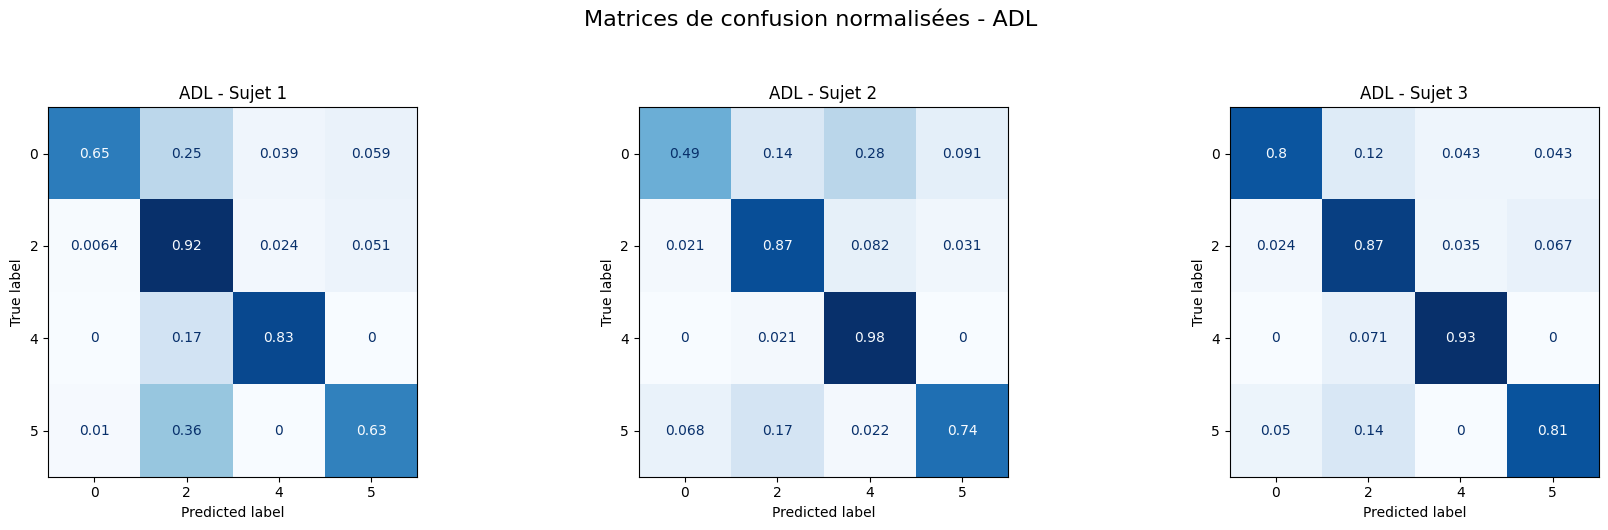

In [103]:
#LDA

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i in range(3):
    ConfusionMatrixDisplay.from_predictions(
        Xval[i]['phase'],
        Xpredadl[i],
        normalize='true',
        cmap='Blues',
        ax=axes[i],
        colorbar=False  # evita múltiplas barras de cor
    )
    axes[i].set_title(f"ADL - Sujet {i+1}")

# Ajustar espaçamento e adicionar título geral
plt.suptitle("Matrices de confusion normalisées - ADL", fontsize=16, y=1.05)
plt.tight_layout()

# Salvar o plot
plt.savefig(folder_path + "ConfusionMatrix_ADL.png", bbox_inches='tight', dpi=300)


print(" Figure enregistrée sous :", folder_path + "ConfusionMatrix_ADL.png")

 Figure enregistrée sous : /content/drive/My Drive/Colab Notebooks/Machine LearningConfusionMatrix_Quadratic.png


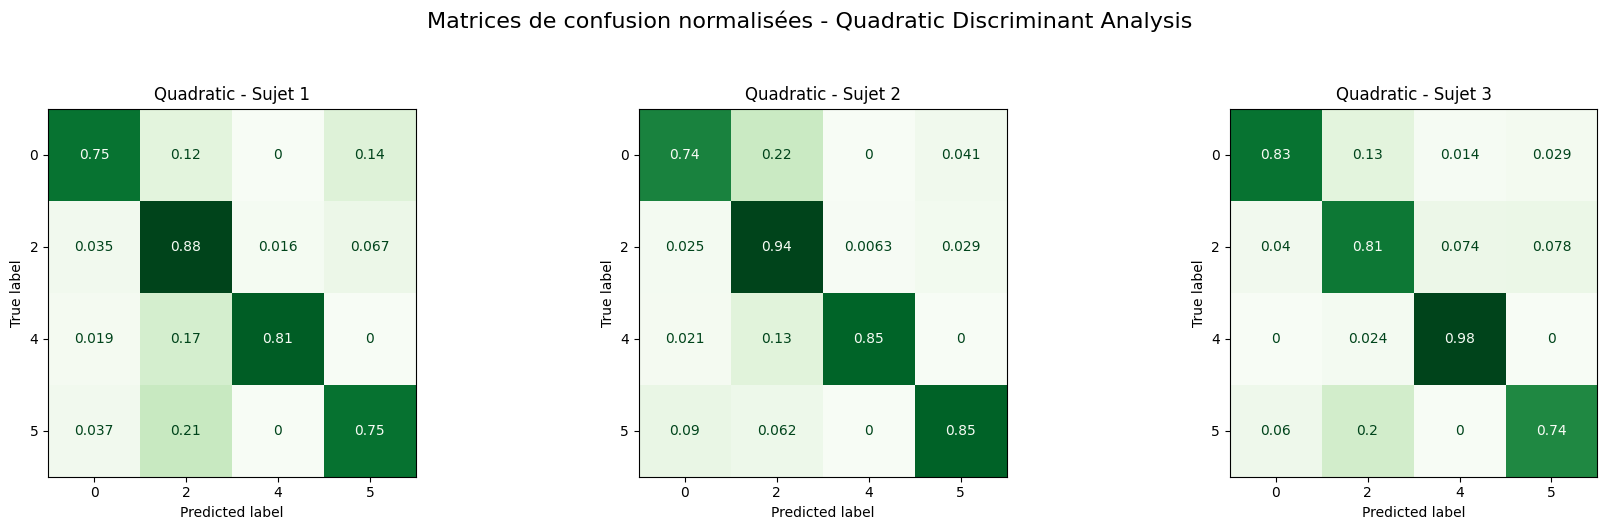

In [104]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i in range(3):
    ConfusionMatrixDisplay.from_predictions(
        Xval[i]['phase'],
        Xpredqda[i],
        normalize='true',
        cmap='Greens',  # cor diferente para o QDA
        ax=axes[i],
        colorbar=False
    )
    axes[i].set_title(f"Quadratic - Sujet {i+1}")

# Título geral e layout ajustado
plt.suptitle("Matrices de confusion normalisées - Quadratic Discriminant Analysis", fontsize=16, y=1.05)
plt.tight_layout()

# Salvar imagem
plt.savefig(folder_path + "ConfusionMatrix_Quadratic.png", bbox_inches='tight', dpi=300)


print(" Figure enregistrée sous :", folder_path + "ConfusionMatrix_Quadratic.png")

 Figure enregistrée sous : /content/drive/My Drive/Colab Notebooks/Machine LearningConfusionMatrix_BayesienNaif.png


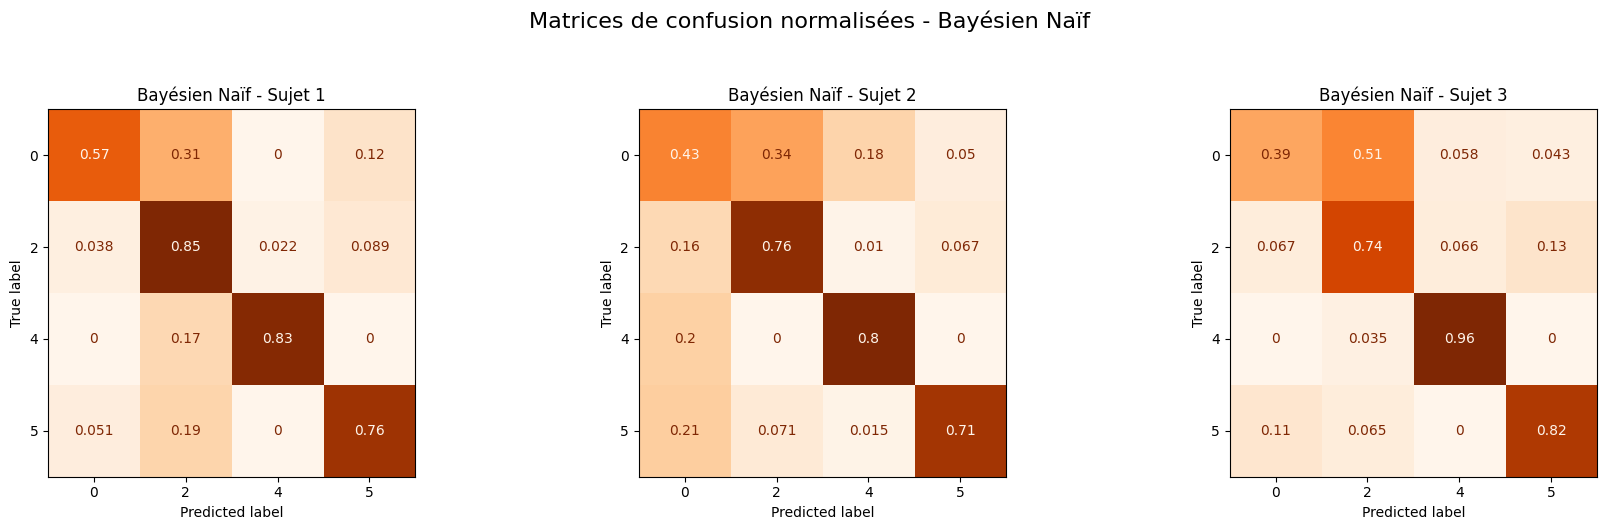

In [105]:
#bayesian naif
# Criar figura com 3 subplots lado a lado
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i in range(3):
    ConfusionMatrixDisplay.from_predictions(
        Xval[i]['phase'],
        Xprednaif[i],
        normalize='true',
        cmap='Oranges',   # cor diferente para distinguir
        ax=axes[i],
        colorbar=False
    )
    axes[i].set_title(f"Bayésien Naïf - Sujet {i+1}")

# Ajustar espaçamento e adicionar título geral
plt.suptitle("Matrices de confusion normalisées - Bayésien Naïf", fontsize=16, y=1.05)
plt.tight_layout()

# Salvar a figura
plt.savefig(folder_path + "ConfusionMatrix_BayesienNaif.png", bbox_inches='tight', dpi=300)

print(" Figure enregistrée sous :", folder_path + "ConfusionMatrix_BayesienNaif.png")

adl balanced accuracy sujet 1 : 0.7565715821971666
quadratic balanced accuracy sujet 1 : 0.7968401184214351
bayesian naif balanced accuracy sujet 1 : 0.7528420625558772

adl balanced accuracy sujet 2 : 0.768388395517005
quadratic balanced accuracy sujet 2 : 0.842216700305343
bayesian naif balanced accuracy sujet 2 : 0.6759421565698938

adl balanced accuracy sujet 3 : 0.8516009789780015
quadratic balanced accuracy sujet 3 : 0.838035308133939
bayesian naif balanced accuracy sujet 3 : 0.7281642619759688

Tabela salva em: /content/drive/My Drive/Colab Notebooks/Machine Learningbalanced_accuracy_table.png


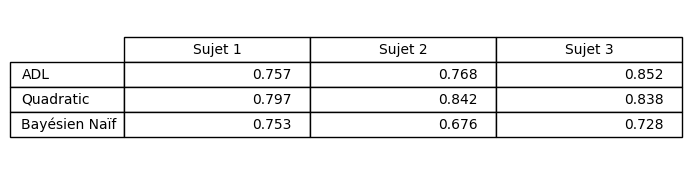

In [106]:
accadl, accqda, accnaif = [],[],[]
# Cálculo das balanced accuracies
for i in range(3):
    accadl.append(balanced_accuracy_score(y_true=Xval[i]['phase'], y_pred=Xpredadl[i]))
    accqda.append(balanced_accuracy_score(y_true=Xval[i]['phase'], y_pred=Xpredqda[i]))
    accnaif.append(balanced_accuracy_score(y_true=Xval[i]['phase'], y_pred=Xprednaif[i]))

    print(f"adl balanced accuracy sujet {i+1} : {accadl[-1]}")
    print(f"quadratic balanced accuracy sujet {i+1} : {accqda[-1]}")
    print(f"bayesian naif balanced accuracy sujet {i+1} : {accnaif[-1]}")
    print()

# Criação de um DataFrame para a tabela
data = {
    "Sujet 1": [accadl[0], accqda[0], accnaif[0]],
    "Sujet 2": [accadl[1], accqda[1], accnaif[1]],
    "Sujet 3": [accadl[2], accqda[2], accnaif[2]]
}

df = pd.DataFrame(data, index=["ADL", "Quadratic", "Bayésien Naïf"])

# Plot da tabela como imagem
fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df.round(3).values,
                 colLabels=df.columns,
                 rowLabels=df.index,
                 loc='center')

# Personalização da tabela
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)

# Salvar a tabela como imagem
plt.savefig(folder_path + "balanced_accuracy_table.png", bbox_inches='tight', dpi=300)

print("Tabela salva em:", folder_path + "balanced_accuracy_table.png")

# KNN
# SLIDE 6

In [107]:
Xtrainnumcr, Xvalnumcr = [0,0,0],[0,0,0]
for i in range(3):
  Xtrainnumcr[i] = StandardScaler().fit_transform(Xtrainnum[i])
  Xvalnumcr[i] = StandardScaler().fit_transform(Xvalnum[i])

In [108]:
max_acc, best_k = 0,0
acc = []
for j in range(25):
  knc = KNeighborsClassifier(n_neighbors=j+1)
  Xpredknc = cross_val_predict(knc, Xtrainnumcr[0], Xtrain[0]["phase"], cv=5)
  a = balanced_accuracy_score(y_true=Xtrain[0]['phase'], y_pred=Xpredknc)
  acc.append(a)
  if max_acc < a:
    max_acc = a
    best_k = j+1
print(max_acc)
print(best_k)

0.7564225737990786
5


Text(0, 0.5, 'accuracy')

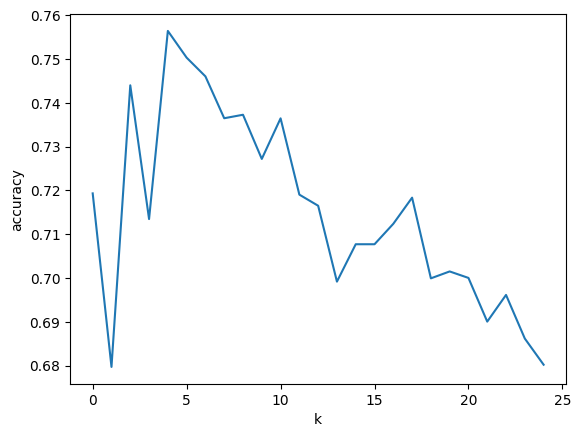

In [109]:
plt.plot(acc)
plt.xlabel("k")
plt.ylabel("accuracy")

Melhor balanced accuracy: 0.7539
Melhor k: 5
Intervalo de confiança (95%) para o melhor k: [0.6793, 0.8284]
Figura salva em: /content/drive/My Drive/Colab Notebooks/Machine LearningKNN_BalancedAccuracy_ICparK.png


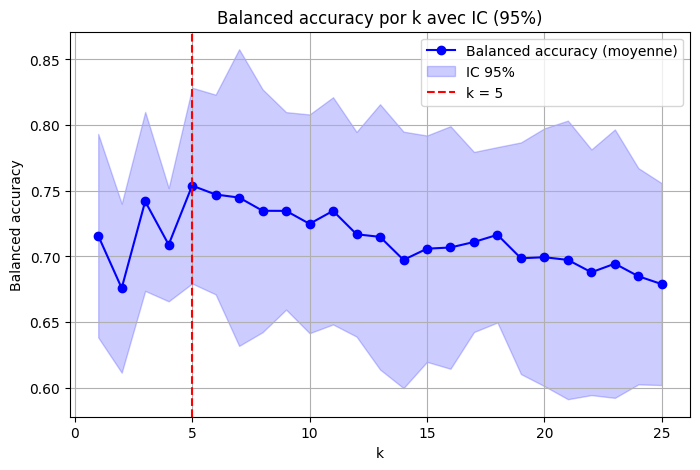

In [110]:
#IA
max_acc, best_k = 0, 0
k_values = range(1, 26)
mean_acc = []
ci_lower = []
ci_upper = []

# Loop sobre diferentes valores de k
for k in k_values:
    knc = KNeighborsClassifier(n_neighbors=k)

    # cross_val_score retorna uma acurácia por fold
    scores = cross_val_score(knc, Xtrainnumcr[0], Xtrain[0]["phase"], cv=5,
                             scoring=make_scorer(balanced_accuracy_score))

    mean = np.mean(scores)
    std = np.std(scores, ddof=1)
    n = len(scores)

    # Intervalo de confiança (95%)
    h = stats.t.ppf(0.975, n - 1) * std / np.sqrt(n)

    mean_acc.append(mean)
    ci_lower.append(mean - h)
    ci_upper.append(mean + h)

    if mean > max_acc:
        max_acc = mean
        best_k = k
        best_ci = (mean - h, mean + h)  # armazenar IC do melhor k

# Exibir resultados principais
print(f"Melhor balanced accuracy: {max_acc:.4f}")
print(f"Melhor k: {best_k}")
print(f"Intervalo de confiança (95%) para o melhor k: [{best_ci[0]:.4f}, {best_ci[1]:.4f}]")

# Plot com IC
plt.figure(figsize=(8,5))
plt.plot(k_values, mean_acc, color='blue', marker='o', label="Balanced accuracy (moyenne)")
plt.fill_between(k_values, ci_lower, ci_upper, color='blue', alpha=0.2, label="IC 95%")
plt.axvline(best_k, color='red', linestyle='--', label=f"k = {best_k}")
plt.xlabel("k")
plt.ylabel("Balanced accuracy")
plt.title("Balanced accuracy por k avec IC (95%)")
plt.legend()
plt.grid(True)

# Salvar imagem
plt.savefig(folder_path + "KNN_BalancedAccuracy_ICparK.png", bbox_inches='tight', dpi=300)


print("Figura salva em:", folder_path + "KNN_BalancedAccuracy_ICparK.png")


In [111]:
accknc, Xpredknc = [], []
for i in range(3):
  knc = KNeighborsClassifier(n_neighbors=best_k)
  knc.fit(Xtrainnumcr[i],Xtrain[i]['phase'])
  Xpredknc.append(knc.predict(Xvalnumcr[i]))
  accknc.append(balanced_accuracy_score(y_true=Xval[i]['phase'], y_pred=Xpredknc[i]))

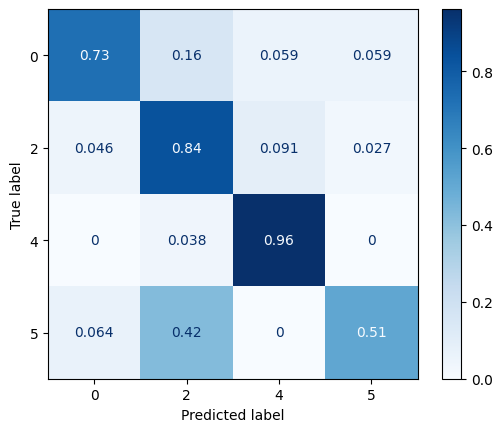

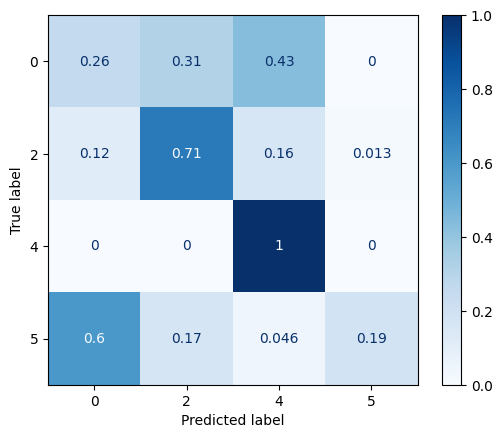

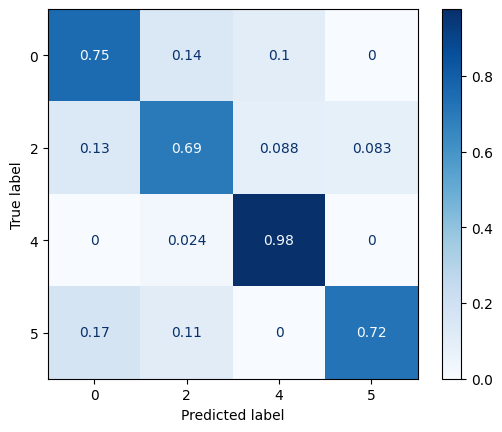

In [112]:
#K voisins
for i in range(3):
 ConfusionMatrixDisplay.from_predictions(Xval[i]['phase'].to_numpy(), Xpredknc[i], normalize="true", cmap="Blues")

# slide 7

In [113]:
for i in range(3):
  print("adl balanced accuracy sujet", str(i+1), ": ", accadl[i])
  print("quadratic balanced accuracy sujet", str(i+1), ": ", accqda[i])
  print("bayesian naif balanced accuracy sujet", str(i+1), ": ", accnaif[i])
  print("KNN balanced accuracy sujet", str(i+1), ": ", accknc[i])
  print()

adl balanced accuracy sujet 1 :  0.7565715821971666
quadratic balanced accuracy sujet 1 :  0.7968401184214351
bayesian naif balanced accuracy sujet 1 :  0.7528420625558772
KNN balanced accuracy sujet 1 :  0.7587705031468578

adl balanced accuracy sujet 2 :  0.768388395517005
quadratic balanced accuracy sujet 2 :  0.842216700305343
bayesian naif balanced accuracy sujet 2 :  0.6759421565698938
KNN balanced accuracy sujet 2 :  0.5385429480626737

adl balanced accuracy sujet 3 :  0.8516009789780015
quadratic balanced accuracy sujet 3 :  0.838035308133939
bayesian naif balanced accuracy sujet 3 :  0.7281642619759688
KNN balanced accuracy sujet 3 :  0.7864468324004192



In [114]:
# Calculate the standard deviation and mean of balanced accuracies for each model
std_accadl = np.std(accadl)
mean_accadl = np.mean(accadl)
std_accqda = np.std(accqda)
mean_accqda = np.mean(accqda)
std_accnaif = np.std(accnaif)
mean_accnaif = np.mean(accnaif)
std_accknc = np.std(accknc)
mean_accknc = np.mean(accknc)

# Print the standard deviations and means
print(f"ADL: Mean balanced accuracy = {mean_accadl:.4f}, Standard deviation = {std_accadl:.4f}")
print(f"Quadratic Discriminant Analysis: Mean balanced accuracy = {mean_accqda:.4f}, Standard deviation = {std_accqda:.4f}")
print(f"Bayesian Naif: Mean balanced accuracy = {mean_accnaif:.4f}, Standard deviation = {std_accnaif:.4f}")
print(f"KNN: Mean balanced accuracy = {mean_accknc:.4f}, Standard deviation = {std_accknc:.4f}")

ADL: Mean balanced accuracy = 0.7922, Standard deviation = 0.0423
Quadratic Discriminant Analysis: Mean balanced accuracy = 0.8257, Standard deviation = 0.0205
Bayesian Naif: Mean balanced accuracy = 0.7190, Standard deviation = 0.0321
KNN: Mean balanced accuracy = 0.6946, Standard deviation = 0.1109


Tableau enregistré comme image dans : /content/drive/My Drive/Colab Notebooks/Machine LearningBalancedAccuracy_Stats.png


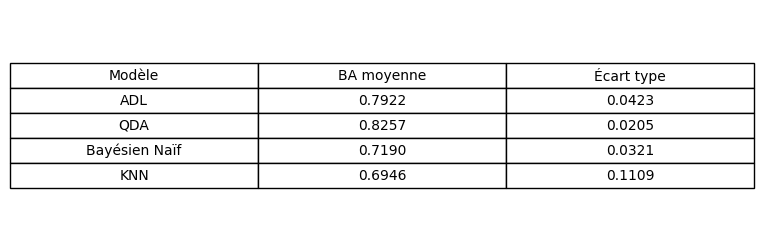

In [115]:
#IA
# Valores de média e desvio padrão
import matplotlib.pyplot as plt

# Valores de média e desvio padrão
models = ["ADL", "QDA", "Bayésien Naïf", "KNN"]
means = [mean_accadl, mean_accqda, mean_accnaif, mean_accknc]
stds = [std_accadl, std_accqda, std_accnaif, std_accknc]

# Criação da tabela com matplotlib
fig, ax = plt.subplots(figsize=(8, 3))
ax.axis('tight')
ax.axis('off')

# Construir dados da tabela
table_data = []
for model, mean, std in zip(models, means, stds):
    table_data.append([model, f"{mean:.4f}", f"{std:.4f}"])

# Criar a tabela
table = ax.table(cellText=table_data,
                 colLabels=["Modèle", "BA moyenne", "Écart type"],
                 loc="center",
                 cellLoc='center',   # centraliza o texto das células
                 colLoc='center')    # centraliza o texto das colunas

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)

# Salvar como imagem
plt.savefig(folder_path + "BalancedAccuracy_Stats.png", bbox_inches='tight', dpi=300)

print("Tableau enregistré comme image dans :", folder_path + "BalancedAccuracy_Stats.png")



# Rejet par ambiguite

In [116]:
Xvalambi, Xtrainambi = [],[]
for i in range (3):
  Xtrainambi.append(Xtrain[i].copy())
  Xvalambi.append(Xval[i].copy())

In [117]:
Xqdaproba = []
for i in range(3):
  Xqdaproba.append(Xqda[i].predict_proba(Xvalnum[i]))

In [118]:
Cr = 0.65
for i in range(3):
  reject_indices = Xqdaproba[i].max(axis=1) <= Cr
  Xvalambi[i].loc[reject_indices, "phase"] = -2

In [119]:
Xvalambi[0].value_counts("phase")

,count
phase,
2,582
5,234
-2,111
4,52
0,46


In [120]:
rejected_count = Xvalambi[0].value_counts("phase").get(-2, 0)
total_count = Xvalambi[0].value_counts("phase").sum()
pourcentage = (rejected_count / total_count) * 100 if total_count >= 0 else 0

print(f"Percentage of rejected samples for Subject 1: {pourcentage:.2f}%")

Percentage of rejected samples for Subject 1: 10.83%


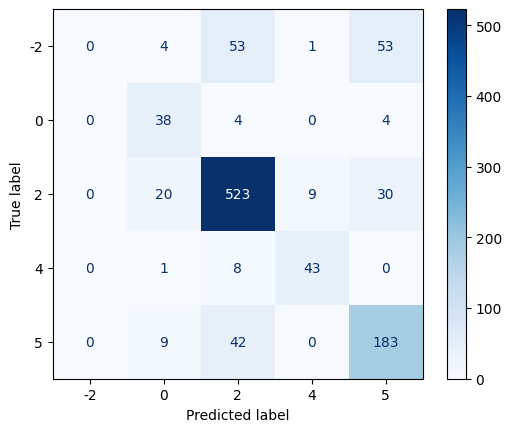

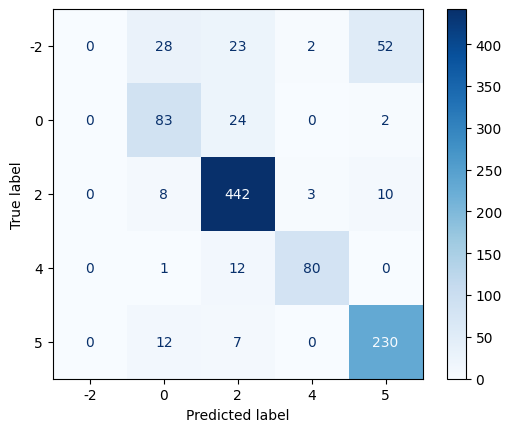

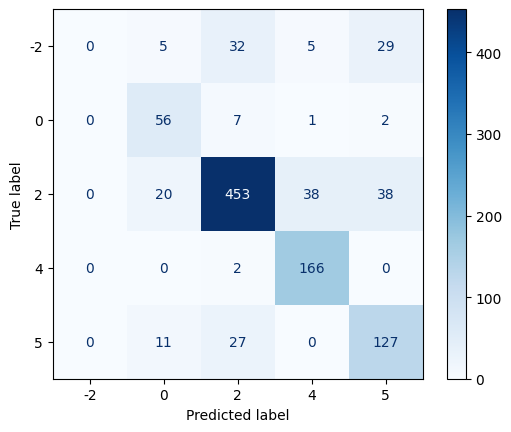

In [121]:

for i in range(3):
  ConfusionMatrixDisplay.from_predictions(Xvalambi[i]["phase"], Xpredqda[i], cmap="Blues")

# SLIDE 8

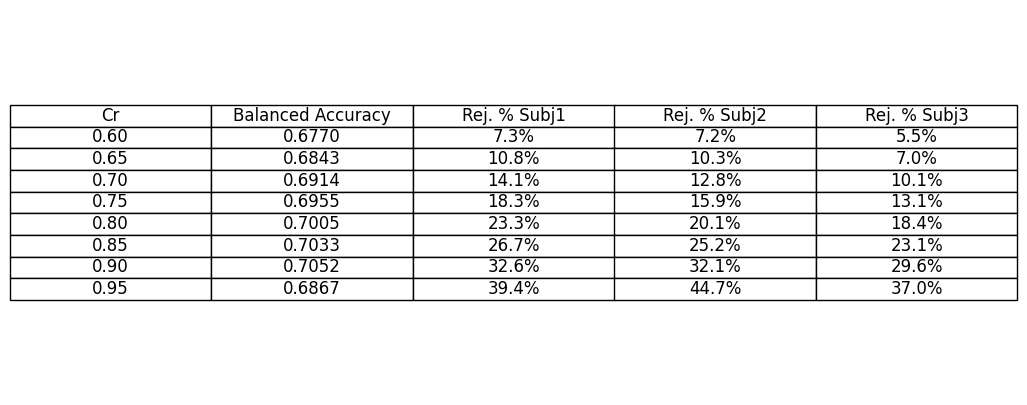

In [122]:


# Inicializar listas
Xtrainambi, Xvalambi = [], []
for i in range(3):
    Xtrainambi.append(Xtrain[i].copy())
    Xvalambi.append(Xval[i].copy())

# Definir uma faixa de valores para Cr
cr_values = np.linspace(0.6, 0.95, 8)
balanced_accuracies = []
rejected_percents_per_subject = []  # lista para % rejeitadas

# Calcular balanced accuracy média e % de amostras rejeitadas por sujeito
for cr in cr_values:
    scores = []
    perc_reject_per_subject = []
    for i in range(3):
        Xqdaproba_i = Xqda[i].predict_proba(Xvalnum[i])
        Xval_tmp = Xval[i].copy()
        reject_indices = Xqdaproba_i.max(axis=1) < cr
        Xval_tmp.loc[reject_indices, "phase"] = -2
        score = balanced_accuracy_score(Xval_tmp["phase"], Xpredqda[i])
        scores.append(score)

        # Calcular % de rejeição
        total_count = len(Xval_tmp)
        rejected_count = np.sum(reject_indices)
        perc_reject = (rejected_count / total_count) * 100 if total_count > 0 else 0
        perc_reject_per_subject.append(perc_reject)

    balanced_accuracies.append(np.mean(scores))
    rejected_percents_per_subject.append(perc_reject_per_subject)

# Criar a tabela como imagem
fig, ax = plt.subplots(figsize=(10, 5))
ax.axis('tight')
ax.axis('off')

# Preparar dados da tabela
table_data = [[f"{cr:.2f}", f"{acc:.4f}", f"{rej[0]:.1f}%", f"{rej[1]:.1f}%", f"{rej[2]:.1f}%"]
              for cr, acc, rej in zip(cr_values, balanced_accuracies, rejected_percents_per_subject)]
column_labels = ["Cr", "Balanced Accuracy", "Rej. % Subj1", "Rej. % Subj2", "Rej. % Subj3"]

# Criar a tabela
table = ax.table(cellText=table_data, colLabels=column_labels, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.3, 1.3)

plt.show()


# SLIDE 9

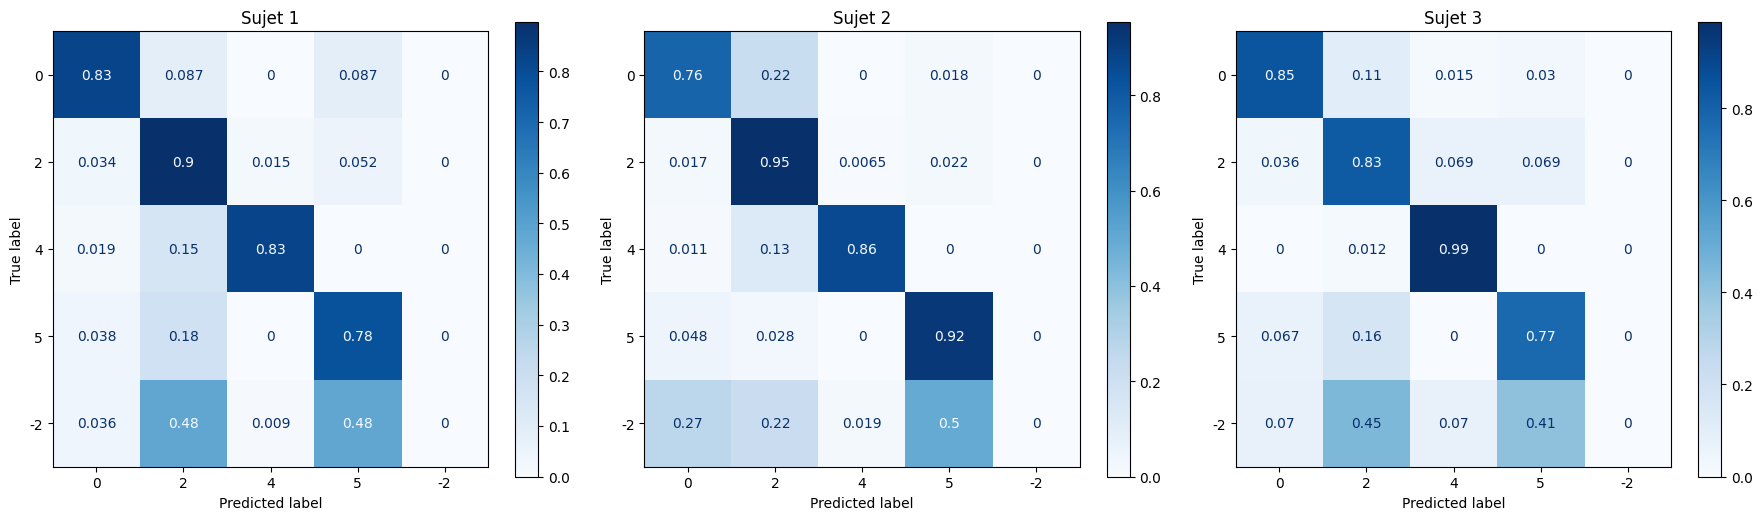

In [123]:
# Cr escolhido
Cr = 0.65

# Atualizar Xvalambi com rejeições
Xqdaproba = [Xqda[i].predict_proba(Xvalnum[i]) for i in range(3)]
for i in range(3):
    reject_indices = Xqdaproba[i].max(axis=1) < Cr
    Xvalambi[i].loc[reject_indices, "phase"] = -2  # classe rejeitada

# Definir todas as classes (incluindo -2 como última)
all_classes = np.unique(np.concatenate([Xvalambi[i]["phase"].unique() for i in range(3)]))
all_classes = np.sort(all_classes)
all_classes = [c for c in all_classes if c != -2] + [-2]  # mover -2 para o final
labels_str = [str(c) for c in all_classes]

# Plotar 3 matrizes de confusão lado a lado
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i in range(3):
    cm = confusion_matrix(
        Xvalambi[i]["phase"],
        Xpredqda[i],
        labels=all_classes,
        normalize='true'  # opcional, mostra percentual
    )
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_str)
    disp.plot(cmap='Blues', colorbar=True, ax=axes[i])
    axes[i].set_title(f"Sujet {i+1}")

plt.tight_layout()
plt.show()


In [124]:
Xvalambi, Xtrainambi = [],[]
for i in range (3):
 Xtrainambi.append(Xtrain[i].copy())
 Xvalambi.append(Xval[i].copy())
Cr=0.65
Xqdaproba = []
for i in range(3):
 Xqdaproba.append(Xqda[i].predict_proba(Xvalnum[i]))
for i in range(3):
 reject_indices = Xqdaproba[i].max(axis=1) < 0.65
 Xvalambi[i].loc[reject_indices, "phase"] = -2
Xvalambi[0].value_counts("phase")

rejected_count = Xvalambi[0].value_counts("phase").get(-2, 0)
total_count = Xvalambi[0].value_counts("phase").sum()
pourcentage = (rejected_count / total_count) * 100 if total_count > 0 else 0

print(f"Percentage of rejected samples for Subject 1: {pourcentage:.2f}%")

Percentage of rejected samples for Subject 1: 10.83%


# rejet par distance

In [125]:
Xrejet = pd.read_excel(folder_path + "/Sujet2_artefact.xlsx",sheet_name=0,header=0,index_col=0)
Xrejet = Xrejet.drop("beta", axis=1)
Xrejetnum = Xrejet.iloc[:,:-1]

In [126]:
def densité_proba(m,co,x):
    ci=np.linalg.inv(co)
    det=np.sqrt(np.linalg.det(co))
    xt=np.reshape(x,(5,1))
    mt=np.reshape(m,(5,1))
    p=np.exp(-0.5*(x-m)@ci@(xt-mt))/(2*np.pi*det)
    return p

In [127]:
F, m, co = [],[],[]
for j in Xrejet['phase'].unique():
  a = Xrejetnum[Xrejet["phase"]==j]
  F.append(a)
  m.append(np.mean(a,axis=0))
  co.append(np.cov(np.transpose(F[0])))
  print(j)

0
2
4
5
-1


In [128]:
cod = []
for i in range(4):
  cod0 = np.zeros((5, 5))
  np.fill_diagonal(cod0, [np.diag(co[i])[0],np.diag(co[i])[1],np.diag(co[i])[2],np.diag(co[i])[3], np.diag(co[i])[4]])
  cod.append(cod0)

In [129]:
co=np.cov(np.transpose(np.concatenate((F[0]-m[0],F[1]-m[1],F[2]-m[2],F[3]-m[3]))))

In [130]:
Xrejetpred = Xrejet.copy()

In [131]:
y, z = [], []
for i in range(len(Xrejet)):
  exemple=Xrejetnum.iloc[i]
  #donner le code pour affecter une  classe à exemple
  p0 = densité_proba(m[0], cod[0], exemple)
  p2 = densité_proba(m[1],cod[1],exemple)
  p4 = densité_proba(m[2],cod[2],exemple)
  p5 = densité_proba(m[3],cod[3],exemple)
  p = p0+p2+p5+p4
  P0 = p0/p
  P2 = p2/p
  P4 = p4/p
  P5 = p5/p
  P = [p0, p2, p4, p5]
  y.append(p)
  z.append(P)
dist = np.percentile(y, 15)
for i in range(len(Xrejet)):
  p = y[i]
  P = z[i]
  if p>=dist:
    x = np.argmax(P)
    match x:
      case 0:
        classe = 0
      case 1:
        classe = 2
      case 2:
        classe = 4
      case 3:
        classe = 5
  else:
    classe = -1
  Xrejetpred.loc[i, "phase"] = classe

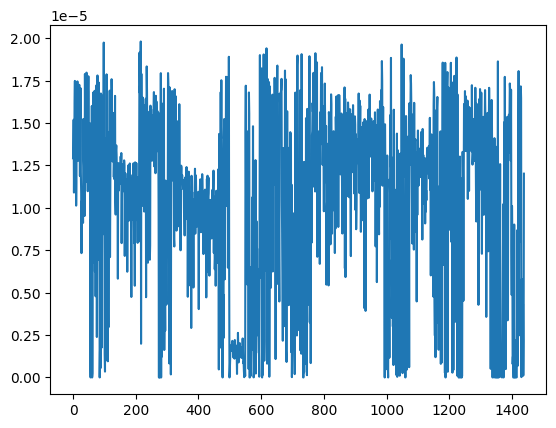

In [132]:
plt.plot(y)

# SLIDE 10

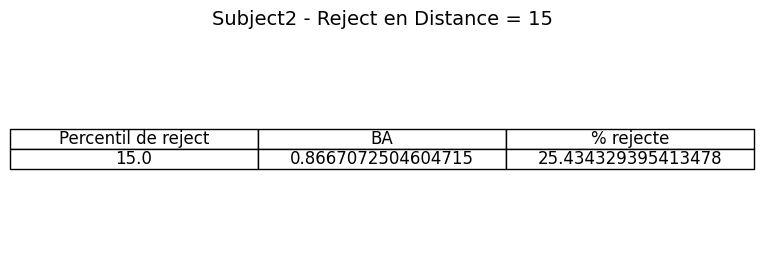

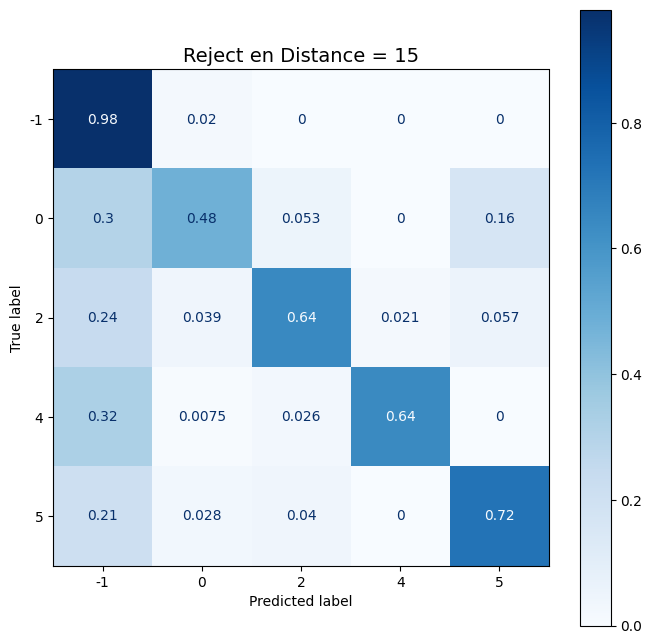

In [133]:

# Preparar dados
Xrejetnum = Xrejet.iloc[:, :-1].values
y = Xrejet["phase"].values

# Treinar QDA
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(Xrejetnum, y)

# Probabilidades
prob = qda.predict_proba(Xrejetnum)
prob_sum = prob.sum(axis=1)

# Limiar de rejeição
distance = 15  # percentil de rejeição
threshold = np.percentile(prob_sum, distance)
mask_keep = prob_sum > threshold
y_pred = qda.predict(Xrejetnum)

# Atualizar Xrejetpred como no seu código
Xrejetpred = Xrejet.copy()
for i in range(len(Xrejet)):
    if mask_keep[i]:
        Xrejetpred.loc[i, "phase"] = y_pred[i]
    else:
        Xrejetpred.loc[i, "phase"] = -1

# Métricas
balanced_acc = balanced_accuracy_score(y[mask_keep], y_pred[mask_keep])
percent_rejected = 100 * (1 - np.mean(mask_keep))

# Criar DataFrame da tabela
df_table = pd.DataFrame({
    "Percentil de reject": [distance],
    "BA": [balanced_acc],
    "% rejecte": [percent_rejected]
})

# Exibir tabela como imagem
fig, ax = plt.subplots(figsize=(8,3))
ax.axis('off')
table = ax.table(
    cellText=df_table.values,
    colLabels=df_table.columns,
    cellLoc='center',
    loc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)
plt.title(f"Subject2 - Reject en Distance = {distance}", fontsize=14)
plt.show()

# Plotar matriz de confusão
fig, ax = plt.subplots(figsize=(8, 8))
ConfusionMatrixDisplay.from_predictions(
    y,
    Xrejetpred["phase"],
    normalize="true",
    cmap="Blues",
    ax=ax
)
ax.set_title(f"Reject en Distance = {distance}", fontsize=14)
plt.show()


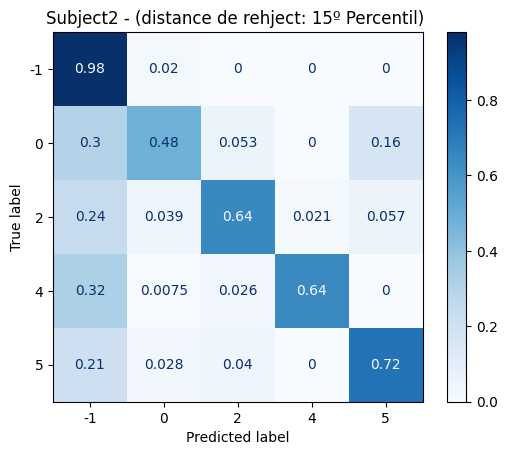

In [134]:

# Criar a matriz de confusão normalizada
disp = ConfusionMatrixDisplay.from_predictions(
    Xrejet['phase'],
    Xrejetpred["phase"],
    normalize="true",
    cmap="Blues"
)

# Adicionar título
plt.title("Subject2 - (distance de rehject: 15º Percentil) ")
plt.show()

# inter slide 11

In [135]:
Xtrainij = Xtrain[0].copy()
Xtrainnumij = Xtrainnum[0].copy()
Xvalij = Xval[0].copy()
Xvalnumij = Xvalnum[0].copy()
for i in range(2):
  b = Xtrain[i+1].copy()
  Xtrainij = pd.concat([Xtrainij, b])
  b = Xtrainnum[i+1].copy()
  Xtrainnumij = pd.concat([Xtrainnumij, b])
  b = Xval[i+1].copy()
  Xvalij = pd.concat([Xvalij, b])
  b = Xvalnum[i+1].copy()
  Xvalnumij = pd.concat([Xvalnumij, b])

In [136]:
adl = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()
naif = GaussianNB()

adl.fit_transform(Xtrainnumij,Xtrainij['phase'])
qda.fit(Xtrainnumij,Xtrainij['phase'])
naif.fit(Xtrainnumij,Xtrainij['phase'])

GaussianNB()

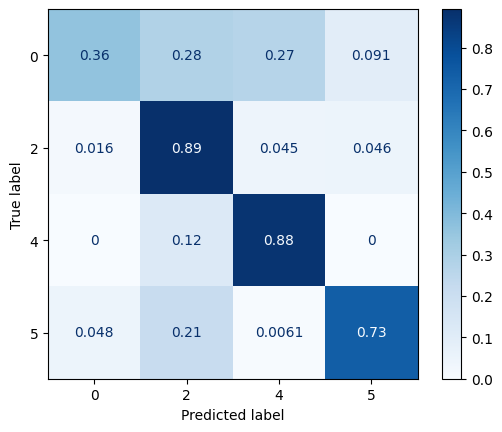

In [137]:
ConfusionMatrixDisplay.from_predictions(Xvalij['phase'], adl.predict(Xvalnumij), normalize="true", cmap="Blues")

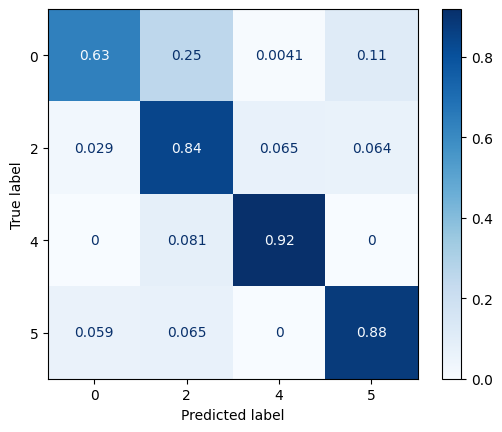

In [138]:
ConfusionMatrixDisplay.from_predictions(Xvalij['phase'], qda.predict(Xvalnumij), normalize="true", cmap="Blues")

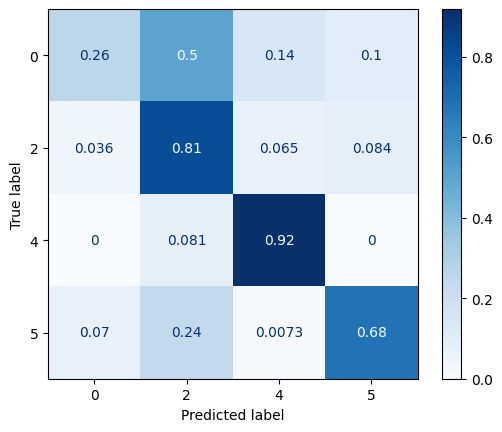

In [139]:
ConfusionMatrixDisplay.from_predictions(Xvalij['phase'], naif.predict(Xvalnumij), normalize="true", cmap="Blues")

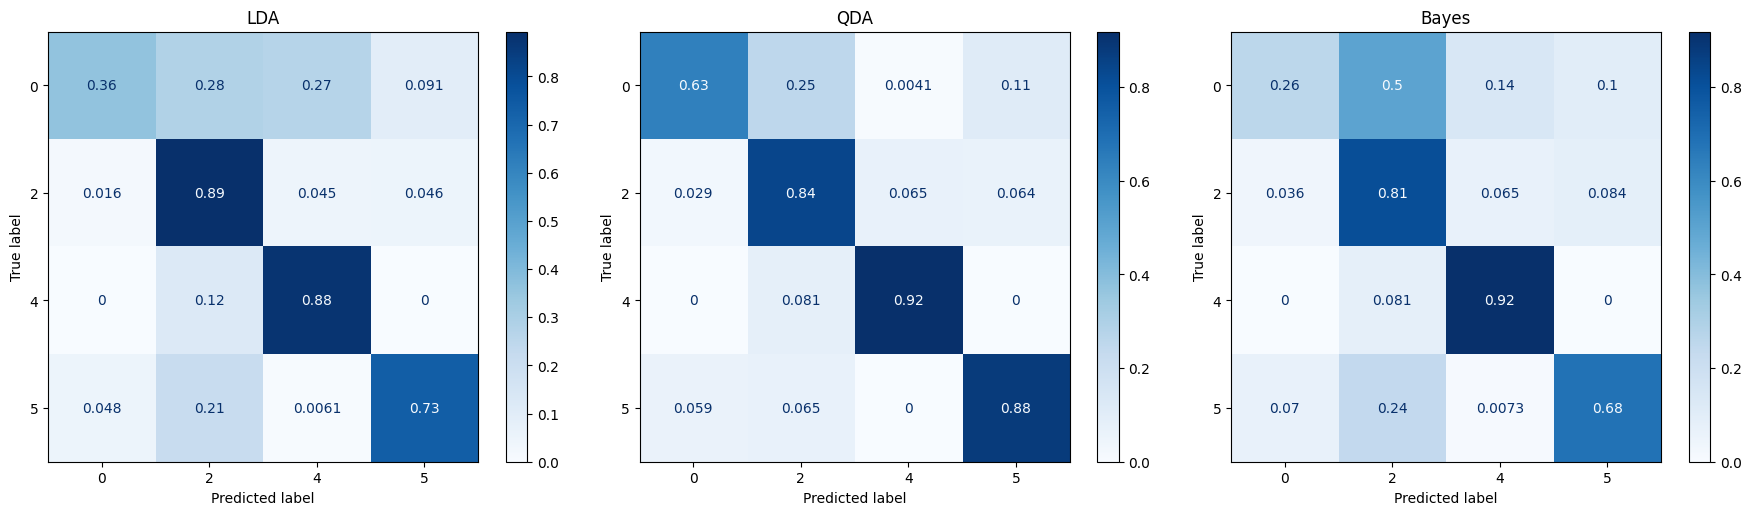

In [140]:


# Criando a figura com 1 linha e 3 colunas
fig, axes = plt.subplots(1, 3, figsize=(18, 5))


# LDA
ConfusionMatrixDisplay.from_predictions(
    Xvalij['phase'],
    adl.predict(Xvalnumij),
    normalize="true",
    cmap="Blues",
    ax=axes[0]
)
axes[0].set_title("LDA")

# QDA
ConfusionMatrixDisplay.from_predictions(
    Xvalij['phase'],
    qda.predict(Xvalnumij),
    normalize="true",
    cmap="Blues",
    ax=axes[1]
)
axes[1].set_title("QDA")

# Naive Bayes
ConfusionMatrixDisplay.from_predictions(
    Xvalij['phase'],
    naif.predict(Xvalnumij),
    normalize="true",
    cmap="Blues",
    ax=axes[2]
)
axes[2].set_title("Bayes")

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajusta layout para não sobrepor o título geral
plt.show()


In [141]:
print("adl balanced accuracy sujet: ", balanced_accuracy_score(y_true=Xvalij['phase'], y_pred=adl.predict(Xvalnumij)))
print("quadratic balanced accuracy sujet: ", balanced_accuracy_score(y_true=Xvalij['phase'], y_pred=qda.predict(Xvalnumij)))
print("bayesian naif balanced accuracy sujet: ", balanced_accuracy_score(y_true=Xvalij['phase'], y_pred=naif.predict(Xvalnumij)))

adl balanced accuracy sujet:  0.7165629335743686
quadratic balanced accuracy sujet:  0.8182208762499066
bayesian naif balanced accuracy sujet:  0.6682125623922899
